# Importing Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings(action='ignore')

# Reading Dataset

In [2]:
df = pd.read_csv('news.csv')

# Exploratory Data Analysis (EDA)

In [3]:
df.shape

(6335, 4)

In [4]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [6]:
df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [8]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [9]:
df.sample(5)

,Unnamed: 0,title,text,label
664,1951,OnPolitics | 's politics blog,What you need to know about the election recou...,REAL
2258,1955,Election 2016: Rand Paul poised to launch camp...,"Watch ""The Situation Room with Wolf Blitzer"" W...",REAL
4857,10358,90 Percent of So-Called Clean Hydroelectric Pr...,By Marco Torres A new study has confirmed what...,FAKE
2022,7062,MASSIVE Global Bond Write-Down Coming on Back ...,A massive global debt write-down of sovereign ...,FAKE
2778,916,"Can Donald Trump really hit 1,237 before Cleve...",(CNN) Donald Trump is now the only Republican ...,REAL


In [10]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [11]:
df['title'][0]

'You Can Smell Hillary’s Fear'

In [12]:
df['text'][0]

'Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that the entir

In [13]:
df.drop('Unnamed: 0',axis =1, inplace=True)

In [14]:
df.drop('text',axis=1,inplace=True)

In [15]:
df.drop_duplicates(inplace=True)

<AxesSubplot:xlabel='label', ylabel='count'>

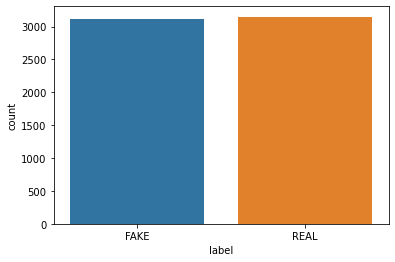

In [16]:
sns.countplot(df['label'])

# NLP

# Importing Libraries

In [17]:
import nltk
import re
import random

In [18]:
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.corpus import stopwords as sw
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gul\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
len(df)

6256

In [20]:
wd = WordNetLemmatizer()
corpus = []
for i in range(0,len(df)):
    title = re.sub('[^a-zA-Z]',' ',df['title'].iloc[i])
    title = title.lower()
    title = title.split()
    title = [wd.lemmatize(word) for word in title if not word in sw.words('english')]
    title = ' '.join(title)
    corpus.append(title)

In [21]:
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()

In [22]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
y = df['label'].iloc[:].values

In [24]:
y

array(['FAKE', 'FAKE', 'REAL', ..., 'FAKE', 'REAL', 'REAL'], dtype=object)

# Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

# Model Building

In [26]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
model_gnb = GaussianNB()
model_gnb.fit(x_train,y_train)

GaussianNB()

# y-pred

In [27]:
y_pred = model_gnb.predict(x_test)

### Training Accuracy

In [28]:
print('Training accuracy is: ' + str(model_gnb.score(x_train,y_train)*100))

Training accuracy is: 92.36610711430855


In [29]:
print('Test accuracy is : ' + str(model_gnb.score(x_test,y_test)*100))

Test accuracy is : 69.6485623003195


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
cm = confusion_matrix(y_test,y_pred)

In [32]:
cm

array([[336, 276],
       [104, 536]], dtype=int64)

# Classification Report

In [33]:
cr = classification_report(y_test,y_pred)

In [34]:
print(cr)

              precision    recall  f1-score   support

        FAKE       0.76      0.55      0.64       612
        REAL       0.66      0.84      0.74       640

    accuracy                           0.70      1252
   macro avg       0.71      0.69      0.69      1252
weighted avg       0.71      0.70      0.69      1252



# Model Building (Multinomial naive bayes)

In [35]:
model_mnb = MultinomialNB()
model_mnb.fit(x_train,y_train)

MultinomialNB()

# y-pred

In [36]:
y_pred = model_mnb.predict(x_test)

# Score

# training score

In [37]:
print('training score is: ' + str(model_mnb.score(x_train,y_train)*100))

training score is: 92.84572342126299


# Test Score

In [38]:
print('Test score is: '+ str(model_mnb.score(x_test,y_test)*100))

Test score is: 79.87220447284345


In [39]:
cm = confusion_matrix(y_test,y_pred)

In [40]:
cm

array([[453, 159],
       [ 93, 547]], dtype=int64)

In [41]:
cr = classification_report(y_test,y_pred)

In [42]:
print(cr)

              precision    recall  f1-score   support

        FAKE       0.83      0.74      0.78       612
        REAL       0.77      0.85      0.81       640

    accuracy                           0.80      1252
   macro avg       0.80      0.80      0.80      1252
weighted avg       0.80      0.80      0.80      1252



# SVM

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train,y_train)

In [ ]:
print('training score is: ' + str(clf.score(x_train,y_train)*100))

In [ ]:
print('Test score is: '+ str(clf.score(x_test,y_test)*100))

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
print('training score is: ' + str(KNN.score(x_train,y_train)*100))

In [ ]:
print('Test score is: '+ str(KNN.score(x_test,y_test)*100))

# to create wordcloud:

# install library

In [ ]:
pip install wordcloud

# importing library (To create WordCloud)

In [ ]:
from wordcloud import WordCloud

In [ ]:
corpus_str = str(corp)

In [ ]:
plt.figure(figsize = (15,8))
wc = WordCloud(random_state = 1, background_color = 'black', colormap = 'Set2').generate(corpus_str)
plt.imshow(wc)
plt.axis('off')